Dataset loaded successfully from URL!
Dataset Shape: (891, 12)

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53

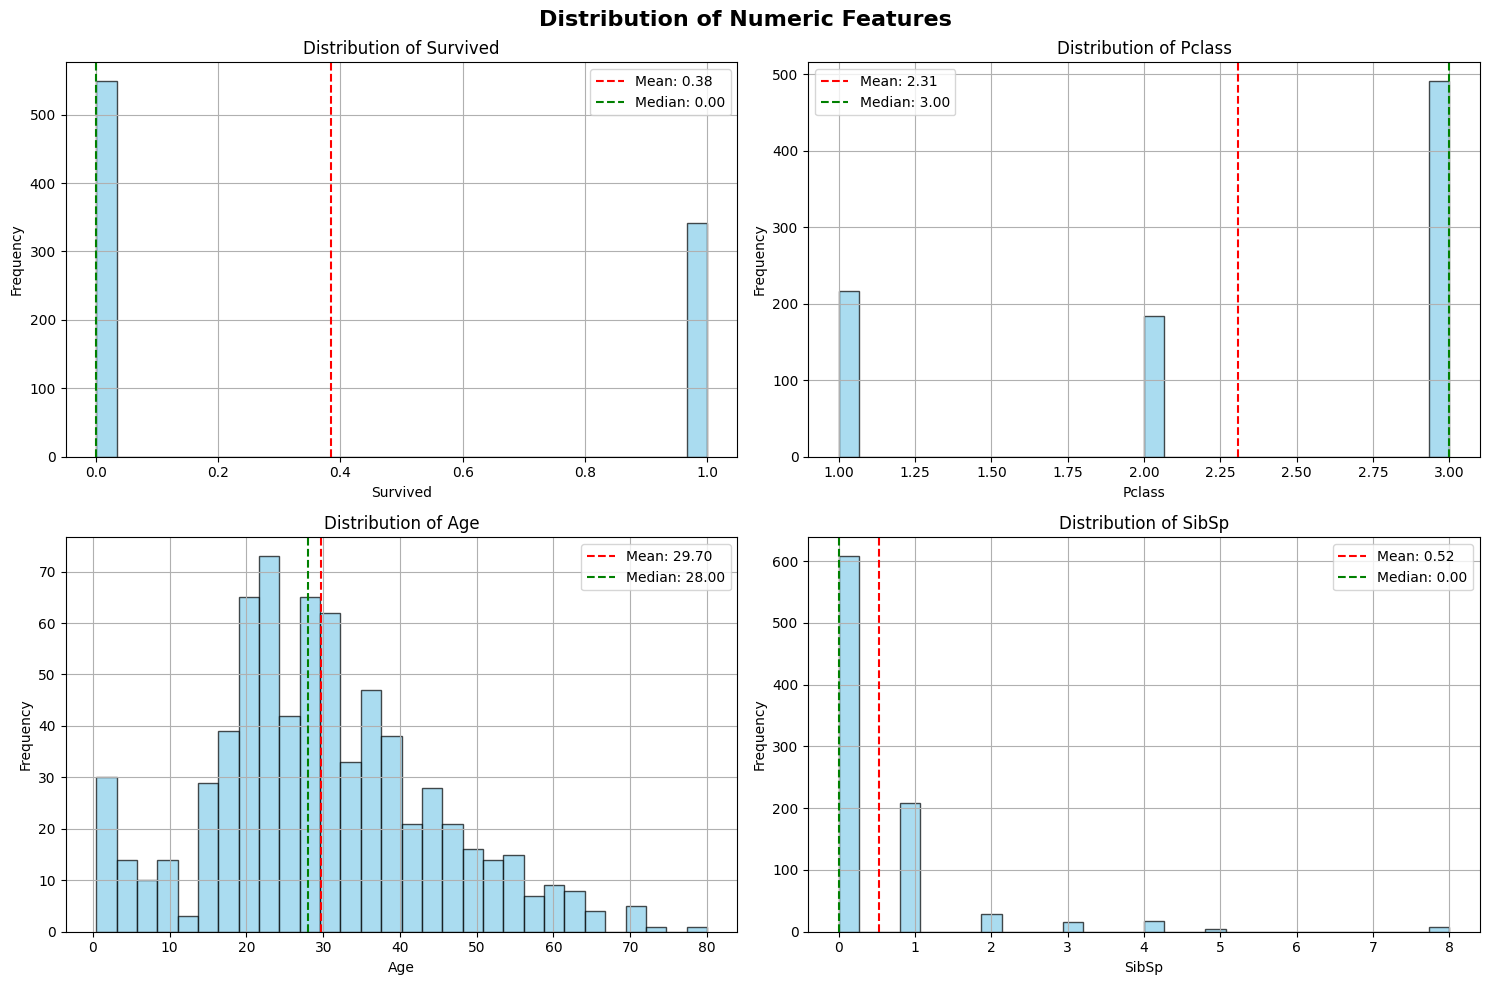

Interactive Histograms:


CREATING BOXPLOTS


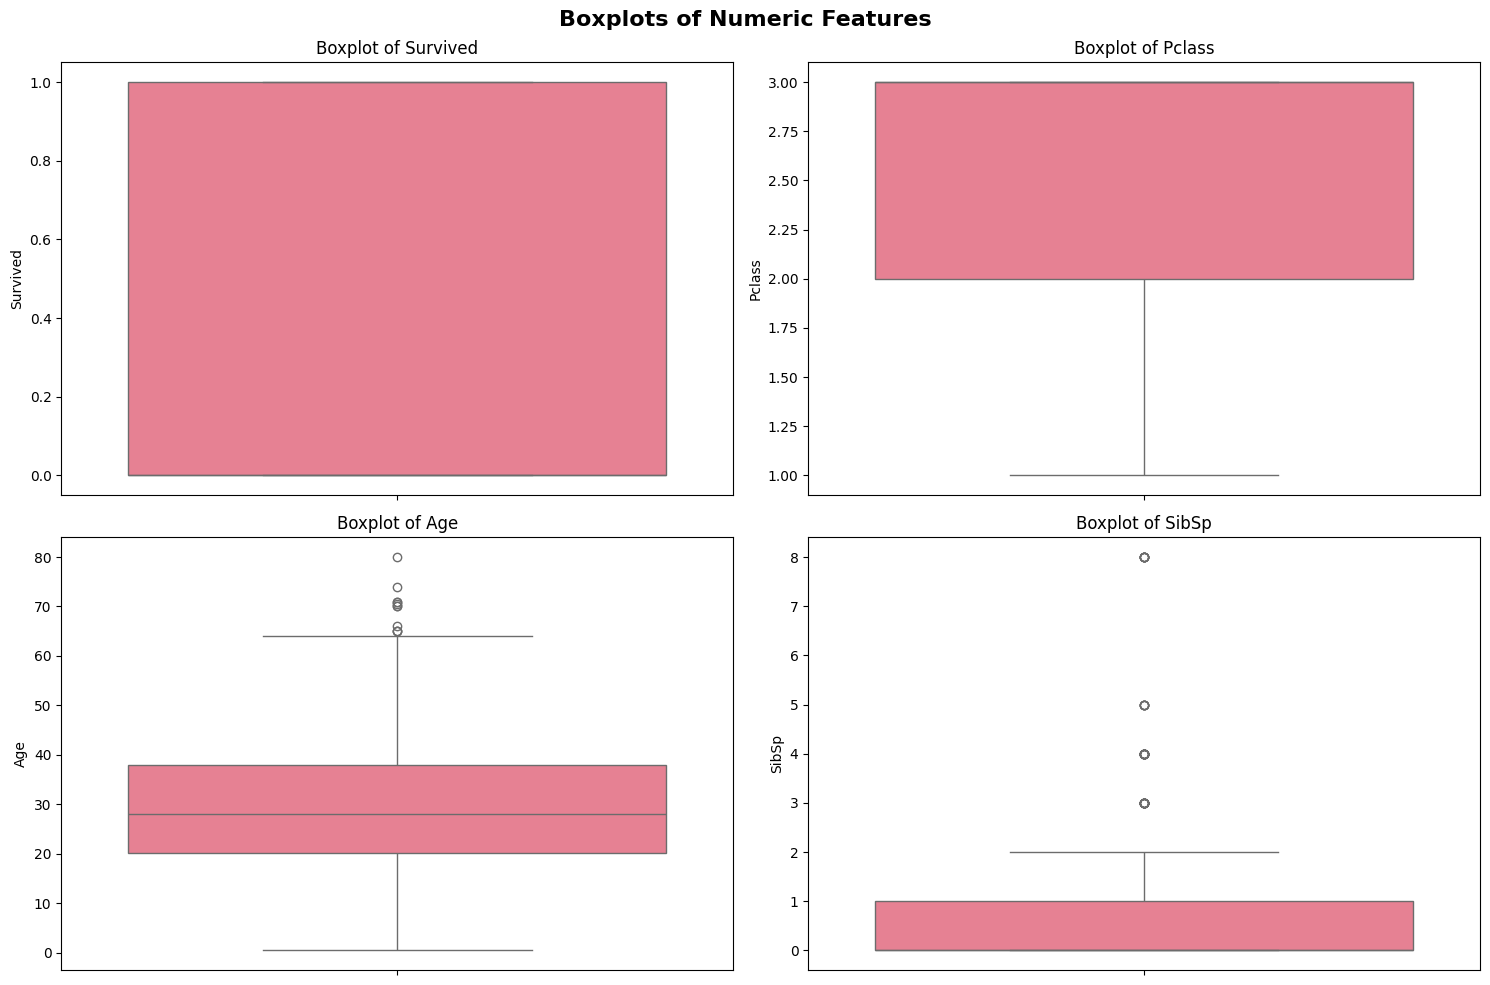

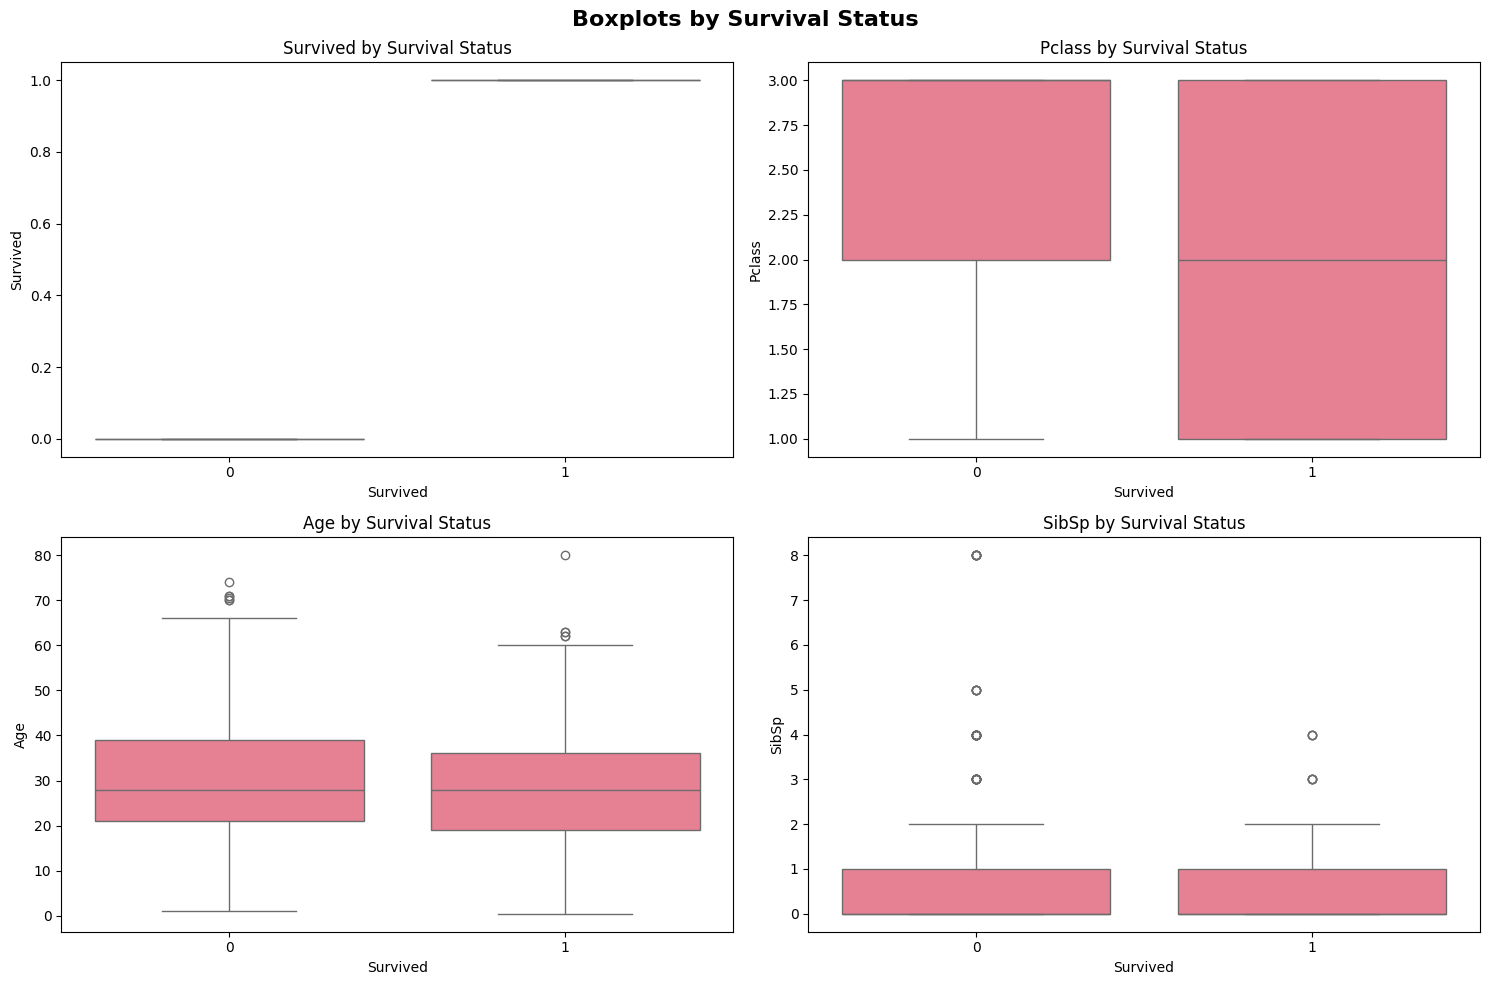

CORRELATION ANALYSIS
Correlation Matrix:
          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


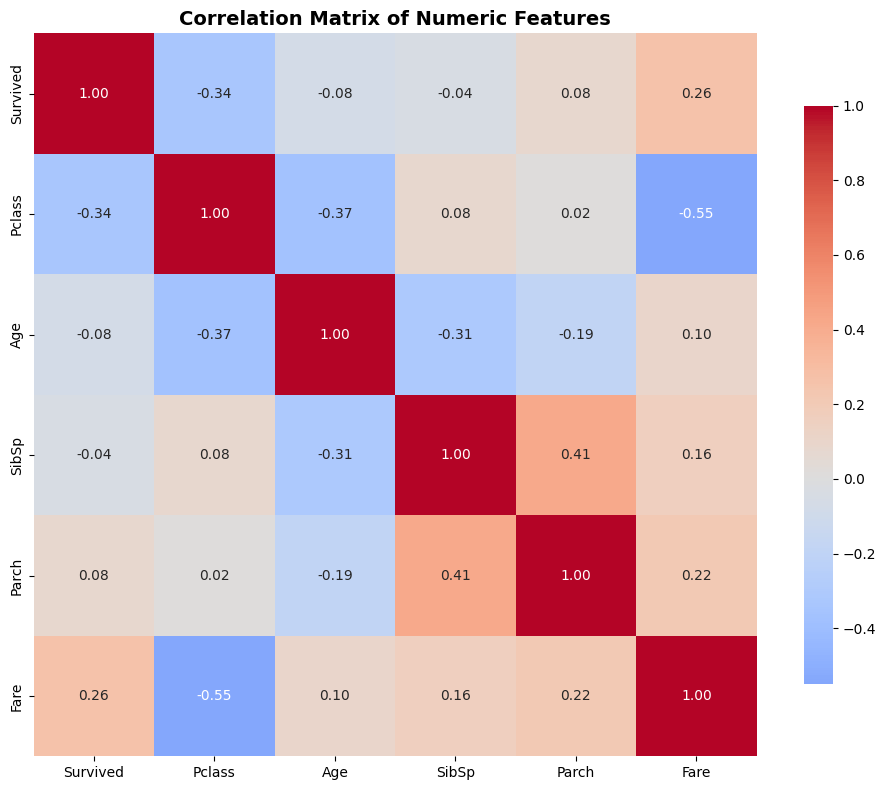

Creating Pairplot...
Creating pairplot for features: ['Pclass', 'Fare', 'Parch']


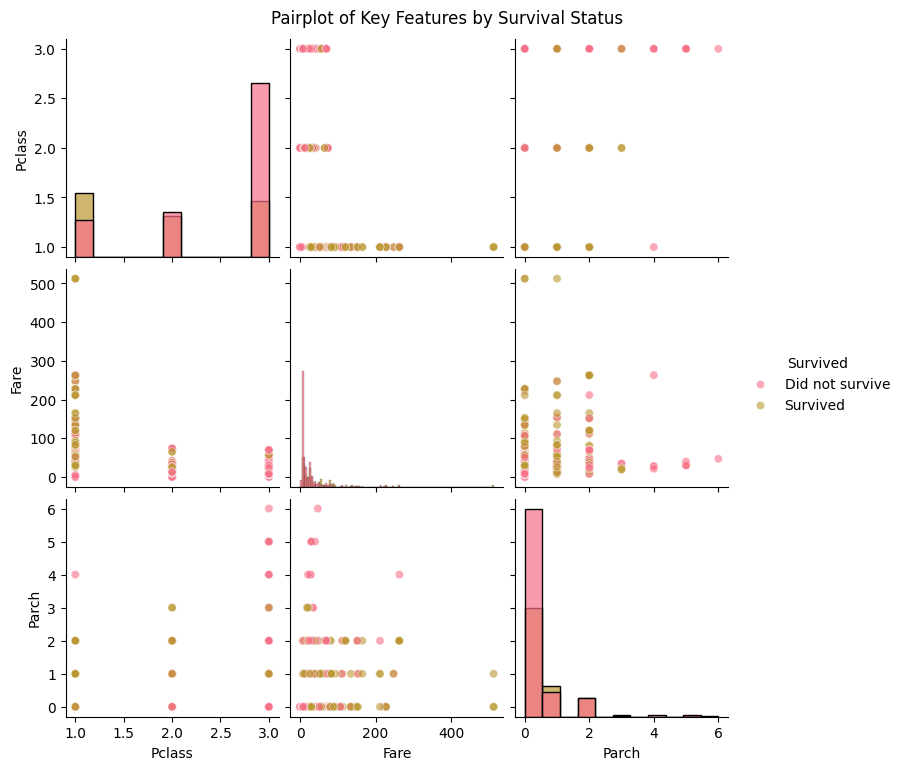

Pairplot created successfully!
PATTERN ANALYSIS
Overall Survival Rate: 38.38%

Survival Rates by Category:

By Gender:
        Total  Survived  Survival_Rate
Sex                                   
female    314       233       0.742038
male      577       109       0.188908

By Passenger Class:
        Total  Survived  Survival_Rate
Pclass                                
1         216       136       0.629630
2         184        87       0.472826
3         491       119       0.242363

By Embarked Port:
          Total  Survived  Survival_Rate
Embarked                                
C           168        93       0.553571
Q            77        30       0.389610
S           644       217       0.336957

By Age Group:
             Total  Survived  Survival_Rate
Age_Group                                  
Child           69        40       0.579710
Teen            70        30       0.428571
Young Adult    358       137       0.382682
Adult          195        78       0.400000
Senior

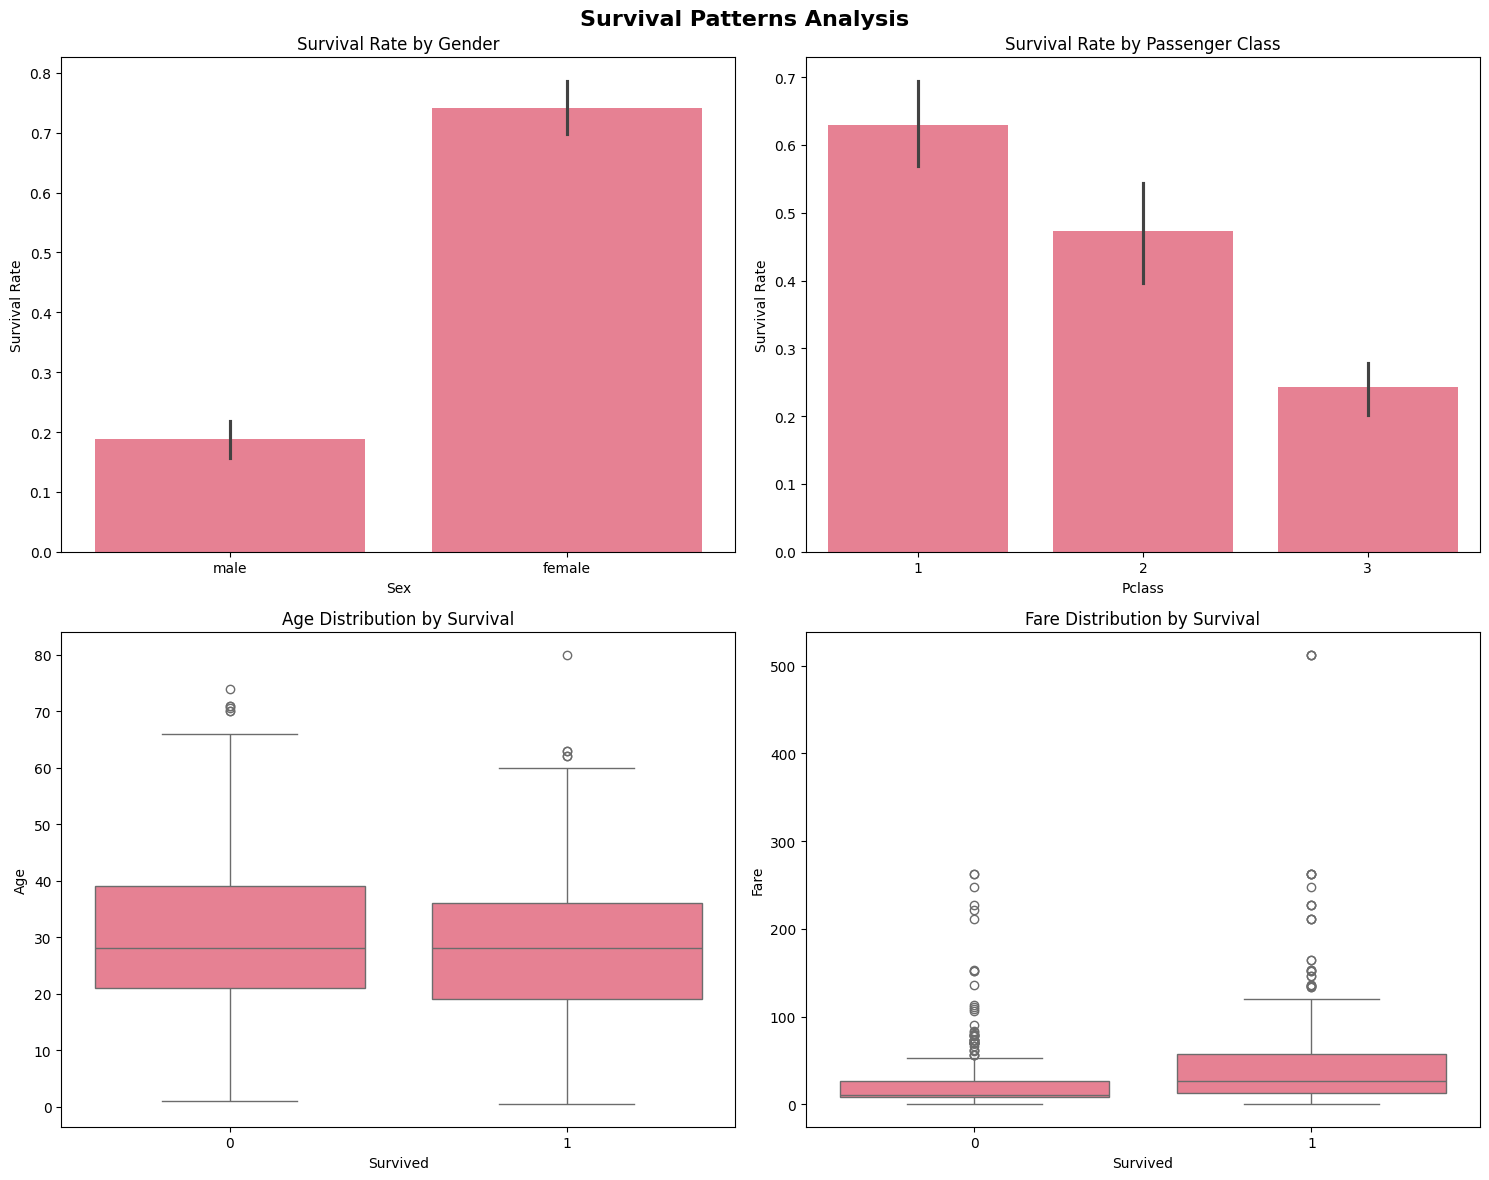

ANOMALY DETECTION

Age Outliers:
Bounds: [-6.69, 64.81]
Number of outliers: 11
Percentage of outliers: 1.23%
Outlier values range: 65.00 to 80.00

Fare Outliers:
Bounds: [-26.72, 65.63]
Number of outliers: 116
Percentage of outliers: 13.02%
Outlier values range: 66.60 to 512.33
FEATURE-LEVEL INFERENCES
KEY INSIGHTS FROM THE ANALYSIS:
----------------------------------------
1. GENDER IMPACT:
   - Female survival rate: 74.2%
   - Male survival rate: 18.9%
   - Women were 3.9x more likely to survive

2. PASSENGER CLASS IMPACT:
   - 1st Class survival rate: 63.0%
   - 3rd Class survival rate: 24.2%
   - 1st Class passengers were 2.6x more likely to survive

3. AGE IMPACT:
   - Children (<16) survival rate: 59.0%
   - Adults (≥16) survival rate: 38.2%

4. FARE IMPACT:
   - High fare passengers survival rate: 51.8%
   - Low fare passengers survival rate: 25.1%

5. OVERALL PATTERNS:
   - Total passengers: 891
   - Overall survival rate: 38.4%
   - Key survival factors: Gender, Class, Age, an

In [5]:
# Titanic Dataset Exploratory Data Analysis (EDA)
# Complete Guide for Google Colab

# ==========================================
# STEP 0: INSTALL AND IMPORT LIBRARIES
# ==========================================

# Install required libraries (run this cell first in Colab)
!pip install plotly seaborn matplotlib pandas

# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# ==========================================
# STEP 1: LOAD THE DATASET
# ==========================================

# Method 1: Upload the CSV file directly to Colab
# Uncomment the lines below to upload file manually
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('titanic.csv')

# Method 2: Load from URL (if available)
# Replace with the actual download URL if you have it
url = "/content/Titanic-Dataset.csv"
try:
    df = pd.read_csv(url)
    print("Dataset loaded successfully from URL!")
except:
    print("Please upload the titanic.csv file manually using the upload method above")

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nColumn Names:")
print(df.columns.tolist())

# ==========================================
# STEP 2: SUMMARY STATISTICS
# ==========================================

print("="*50)
print("SUMMARY STATISTICS")
print("="*50)

# Overall summary statistics
print("Descriptive Statistics for Numeric Features:")
print(df.describe())

# Summary statistics by survival status
print("\nSummary Statistics by Survival Status:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(df.groupby('Survived')[numeric_cols].describe())

# Missing values analysis
print("\nMissing Values Analysis:")
missing_data = df.isnull().sum()
missing_percent = 100 * missing_data / len(df)
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

# Value counts for categorical variables
print("\nValue Counts for Categorical Variables:")
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts())

# ==========================================
# STEP 3: HISTOGRAMS FOR NUMERIC FEATURES
# ==========================================

print("="*50)
print("CREATING HISTOGRAMS")
print("="*50)

# Get numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if 'PassengerId' in numeric_columns:
    numeric_columns.remove('PassengerId')  # Remove ID column

# Create histograms using Matplotlib/Seaborn
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Numeric Features', fontsize=16, fontweight='bold')

# Flatten axes for easier iteration
axes = axes.flatten()

for i, col in enumerate(numeric_columns[:4]):  # Show first 4 numeric columns
    if i < len(axes):
        # Histogram with KDE
        df[col].hist(bins=30, alpha=0.7, ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

        # Add mean and median lines
        axes[i].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
        axes[i].axvline(df[col].median(), color='green', linestyle='--', label=f'Median: {df[col].median():.2f}')
        axes[i].legend()

plt.tight_layout()
plt.show()

# Interactive histograms using Plotly
print("Interactive Histograms:")
for col in numeric_columns:
    fig = px.histogram(df, x=col, title=f'Distribution of {col}',
                      marginal="box", hover_data=df.columns)
    fig.show()

# ==========================================
# STEP 4: BOXPLOTS FOR NUMERIC FEATURES
# ==========================================

print("="*50)
print("CREATING BOXPLOTS")
print("="*50)

# Boxplots using Seaborn
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Boxplots of Numeric Features', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(numeric_columns[:4]):
    if i < len(axes):
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Boxplots by Survival Status
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Boxplots by Survival Status', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(numeric_columns[:4]):
    if i < len(axes):
        sns.boxplot(data=df, x='Survived', y=col, ax=axes[i])
        axes[i].set_title(f'{col} by Survival Status')

plt.tight_layout()
plt.show()

# Interactive boxplots using Plotly
for col in numeric_columns:
    fig = px.box(df, y=col, title=f'Boxplot of {col}')
    fig.show()

# Boxplots by categorical variables
fig = px.box(df, x='Survived', y='Age', title='Age Distribution by Survival Status')
fig.show()

fig = px.box(df, x='Pclass', y='Fare', title='Fare Distribution by Passenger Class')
fig.show()

# ==========================================
# STEP 5: CORRELATION MATRIX AND PAIRPLOT
# ==========================================

print("="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Correlation matrix
correlation_matrix = df[numeric_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numeric Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Interactive correlation heatmap using Plotly
fig = px.imshow(correlation_matrix,
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu',
                title="Interactive Correlation Matrix")
fig.update_layout(title_x=0.5)
fig.show()

# Pairplot using Seaborn
print("Creating Pairplot...")

# Alternative approach: Create manual scatter plots instead of pairplot
try:
    # Get clean numeric columns (excluding PassengerId if present)
    clean_numeric_cols = []
    for col in numeric_columns:
        if col != 'PassengerId' and df[col].notna().sum() > 10:  # At least 10 non-null values
            clean_numeric_cols.append(col)

    if len(clean_numeric_cols) >= 2:
        # Select top 3 features most correlated with Survived
        correlations = {}
        for col in clean_numeric_cols:
            try:
                # Calculate correlation, handling missing values
                temp_df = df[[col, 'Survived']].dropna()
                if len(temp_df) > 10:
                    corr = temp_df[col].corr(temp_df['Survived'])
                    if not pd.isna(corr):
                        correlations[col] = abs(corr)
            except:
                continue

        if len(correlations) >= 2:
            # Sort by correlation strength
            sorted_features = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
            top_features = [feat[0] for feat in sorted_features[:3]]  # Take top 3

            print(f"Creating pairplot for features: {top_features}")

            # Create a clean dataset for plotting
            plot_cols = top_features + ['Survived']
            plot_data = df[plot_cols].dropna().copy()

            # Ensure Survived is treated as categorical
            plot_data['Survived'] = plot_data['Survived'].astype(str)
            plot_data['Survived'] = plot_data['Survived'].map({'0': 'Did not survive', '1': 'Survived'})

            if len(plot_data) > 20:  # Need sufficient data points
                # Create the pairplot
                g = sns.pairplot(plot_data, hue='Survived', diag_kind='hist',
                               plot_kws={'alpha': 0.6}, diag_kws={'alpha': 0.7})
                g.fig.suptitle('Pairplot of Key Features by Survival Status', y=1.02)
                plt.show()

                print("Pairplot created successfully!")
            else:
                print("Insufficient data for pairplot. Creating individual scatter plots instead...")

                # Create individual scatter plots
                n_features = len(top_features)
                if n_features >= 2:
                    fig, axes = plt.subplots(1, min(3, n_features-1), figsize=(15, 5))
                    if n_features == 2:
                        axes = [axes]

                    fig.suptitle('Feature Relationships by Survival Status', fontsize=14)

                    for i in range(min(3, n_features-1)):
                        for j, survived in enumerate([0, 1]):
                            subset = df[df['Survived'] == survived]
                            axes[i].scatter(subset[top_features[0]], subset[top_features[i+1]],
                                          alpha=0.6, label=f'Survived: {survived}')

                        axes[i].set_xlabel(top_features[0])
                        axes[i].set_ylabel(top_features[i+1])
                        axes[i].legend()
                        axes[i].set_title(f'{top_features[0]} vs {top_features[i+1]}')

                    plt.tight_layout()
                    plt.show()
        else:
            print("Not enough features with valid correlations for pairplot.")
    else:
        print("Insufficient numeric columns for pairplot.")

except Exception as e:
    print(f"Alternative pairplot approach failed: {str(e)}")
    print("Creating simple correlation visualization instead...")

    # Fallback: Simple correlation plot
    try:
        # Just show correlations with Survived
        correlations_with_target = []
        for col in numeric_columns:
            if col != 'PassengerId':
                temp_df = df[[col, 'Survived']].dropna()
                if len(temp_df) > 10:
                    corr = temp_df[col].corr(temp_df['Survived'])
                    if not pd.isna(corr):
                        correlations_with_target.append((col, corr))

        if correlations_with_target:
            # Create a simple bar plot of correlations
            features, corrs = zip(*correlations_with_target)
            plt.figure(figsize=(10, 6))
            plt.bar(features, corrs, color=['red' if c < 0 else 'blue' for c in corrs])
            plt.title('Feature Correlations with Survival')
            plt.ylabel('Correlation with Survival')
            plt.xticks(rotation=45)
            plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
            plt.tight_layout()
            plt.show()
            print("Correlation plot created as alternative to pairplot.")
    except:
        print("Fallback correlation plot also failed. Continuing with analysis...")

# ==========================================
# STEP 6: IDENTIFY PATTERNS AND TRENDS
# ==========================================

print("="*50)
print("PATTERN ANALYSIS")
print("="*50)

# Survival rate analysis
survival_rate = df['Survived'].mean()
print(f"Overall Survival Rate: {survival_rate:.2%}")

# Survival by different categories
print("\nSurvival Rates by Category:")

# By Gender
if 'Sex' in df.columns:
    gender_survival = df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean'])
    gender_survival.columns = ['Total', 'Survived', 'Survival_Rate']
    print("\nBy Gender:")
    print(gender_survival)

# By Passenger Class
class_survival = df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean'])
class_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print("\nBy Passenger Class:")
print(class_survival)

# By Embarked Port
if 'Embarked' in df.columns:
    embarked_survival = df.groupby('Embarked')['Survived'].agg(['count', 'sum', 'mean'])
    embarked_survival.columns = ['Total', 'Survived', 'Survival_Rate']
    print("\nBy Embarked Port:")
    print(embarked_survival)

# Age group analysis
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
age_survival = df.groupby('Age_Group')['Survived'].agg(['count', 'sum', 'mean'])
age_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print("\nBy Age Group:")
print(age_survival)

# ==========================================
# STEP 7: VISUALIZATIONS FOR PATTERNS
# ==========================================

# Survival rate by categories
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Survival Patterns Analysis', fontsize=16, fontweight='bold')

# Gender vs Survival
if 'Sex' in df.columns:
    sns.barplot(data=df, x='Sex', y='Survived', ax=axes[0,0])
    axes[0,0].set_title('Survival Rate by Gender')
    axes[0,0].set_ylabel('Survival Rate')

# Class vs Survival
sns.barplot(data=df, x='Pclass', y='Survived', ax=axes[0,1])
axes[0,1].set_title('Survival Rate by Passenger Class')
axes[0,1].set_ylabel('Survival Rate')

# Age vs Survival
df_age = df.dropna(subset=['Age'])
sns.boxplot(data=df_age, x='Survived', y='Age', ax=axes[1,0])
axes[1,0].set_title('Age Distribution by Survival')

# Fare vs Survival
df_fare = df.dropna(subset=['Fare'])
sns.boxplot(data=df_fare, x='Survived', y='Fare', ax=axes[1,1])
axes[1,1].set_title('Fare Distribution by Survival')

plt.tight_layout()
plt.show()

# Interactive visualizations
fig = px.bar(df.groupby('Sex')['Survived'].mean().reset_index(),
             x='Sex', y='Survived', title='Survival Rate by Gender')
fig.show()

fig = px.bar(df.groupby('Pclass')['Survived'].mean().reset_index(),
             x='Pclass', y='Survived', title='Survival Rate by Passenger Class')
fig.show()

# ==========================================
# STEP 8: ANOMALY DETECTION
# ==========================================

print("="*50)
print("ANOMALY DETECTION")
print("="*50)

# Identify outliers using IQR method
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check for outliers in numeric columns
for col in ['Age', 'Fare']:
    if col in df.columns:
        outliers, lower, upper = find_outliers(df, col)
        print(f"\n{col} Outliers:")
        print(f"Bounds: [{lower:.2f}, {upper:.2f}]")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Percentage of outliers: {len(outliers)/len(df)*100:.2f}%")

        if len(outliers) > 0:
            print(f"Outlier values range: {outliers[col].min():.2f} to {outliers[col].max():.2f}")

# ==========================================
# STEP 9: FEATURE-LEVEL INFERENCES
# ==========================================

print("="*50)
print("FEATURE-LEVEL INFERENCES")
print("="*50)

print("KEY INSIGHTS FROM THE ANALYSIS:")
print("-" * 40)

# Calculate key statistics for inferences
total_passengers = len(df)
survival_rate = df['Survived'].mean()

if 'Sex' in df.columns:
    female_survival = df[df['Sex'] == 'female']['Survived'].mean()
    male_survival = df[df['Sex'] == 'male']['Survived'].mean()
    print(f"1. GENDER IMPACT:")
    print(f"   - Female survival rate: {female_survival:.1%}")
    print(f"   - Male survival rate: {male_survival:.1%}")
    print(f"   - Women were {female_survival/male_survival:.1f}x more likely to survive")

class1_survival = df[df['Pclass'] == 1]['Survived'].mean()
class3_survival = df[df['Pclass'] == 3]['Survived'].mean()
print(f"\n2. PASSENGER CLASS IMPACT:")
print(f"   - 1st Class survival rate: {class1_survival:.1%}")
print(f"   - 3rd Class survival rate: {class3_survival:.1%}")
print(f"   - 1st Class passengers were {class1_survival/class3_survival:.1f}x more likely to survive")

if 'Age' in df.columns:
    child_survival = df[df['Age'] < 16]['Survived'].mean()
    adult_survival = df[df['Age'] >= 16]['Survived'].mean()
    print(f"\n3. AGE IMPACT:")
    print(f"   - Children (<16) survival rate: {child_survival:.1%}")
    print(f"   - Adults (≥16) survival rate: {adult_survival:.1%}")

fare_high = df[df['Fare'] > df['Fare'].median()]['Survived'].mean()
fare_low = df[df['Fare'] <= df['Fare'].median()]['Survived'].mean()
print(f"\n4. FARE IMPACT:")
print(f"   - High fare passengers survival rate: {fare_high:.1%}")
print(f"   - Low fare passengers survival rate: {fare_low:.1%}")

print(f"\n5. OVERALL PATTERNS:")
print(f"   - Total passengers: {total_passengers}")
print(f"   - Overall survival rate: {survival_rate:.1%}")
print(f"   - Key survival factors: Gender, Class, Age, and Fare")
print(f"   - 'Women and children first' policy is evident in the data")

print("\n" + "="*50)
print("ANALYSIS COMPLETE!")
print("="*50)